<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colab 实验平台使用模板，以MAE为例</h1>

# 根据如下步骤熟悉如何使用CoLab实验平台

12/19/2021 by：张天翊

* 简介：colab是一个虚拟的服务器分发平台，每次会分给你一个服务器（cpu 56G内存+ 某个GPU）使用可以在后台执行最多24h

* 优点：可以记录结果 + 交互式计算 + 给大家类似本地linux服务器的环境 + 提供论文复现环境
* 为了最大化大家的内卷效率：
实验室决定把多个人学习程序的时候在这个上面执行，或者是短时间的/有复现需求的任务放在colab上，正式长时间模型还是在线下linux服务器跑（路径配置与colab相同）

# 本例子中的文件系统

## 服务器路径结构：
* /home 工作目录
* /home/Insight 项目文件路径
* /home/Insight/runs 存放tensorboard输出
* /home/Insight/saved_models 存模型
* /home/Insight/code 代码总目录（与github一样）
* /home/Insight/code/colab_sample 某某 colab_sample的 个人代码路径（与pycharm同步路径一致）


* /data 数据目录
* /data/Insight 项目数据路径
* /data/Insight/samole_data.zip 数据集压缩包（或文件夹）


## github路径结构
* /Insight     项目的总路径
* /Insight/colab_sample 个人(colab_sample)代码文件夹

## pycharm同步文件夹
* 将本地代码文件夹 与服务器上的/home/Insight/code/colab_sample 个人代码文件夹 同步即可

## Google Drive路径结构
* /mydrive/Insight/code
* /mydrive/Insight/runs
* /mydrive/Insight/saved_models
* /mydrive/dataset/samole_data.zip 数据集压缩包

# 配置运行时资源
* 在开始之前根据需要先把实例切换成gpu+高RAM （右上角'链接'-'查看资源'-'更改运行时类型'的位置设置RAM磁盘啥的，默认的不一定合适） 
* 硬件加速器选None表示这个是CPU环境，选GPU调用有显卡的服务器来进行实验，TPU则只支持基于tensorflow、keras写的代码，我们统一使用PPytorch

* 管理会话查看正在运行的运行时（右上角'链接'-'查看资源'-'管理会话'，注意别把别人的终止掉了） 


# 检查显卡

* 首先检查用的什么卡，最好是v100、P100（这两个区别不是很大）不行的话就T4，再不行就躺平吧
* 目前发现可以开1-3个notebook跑，也就是最多可以用3个单卡环境，无法多卡交互

* 如果显示：NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running. 表示没有显卡

In [1]:
# 查看显卡类型，感叹号在ipynb调用linux指令
!nvidia-smi

Sun Apr 17 08:12:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    32W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 显示时间

In [2]:
# 如果一段时间不需要用显卡的话，可以整个僵尸参数占用点显存，避免出现警告
# import torch
# a = torch.Tensor([1000, 1000, 1000]).cuda()  # 大约占用 1.1G 显存
!date --date='+8 hour'  # 查看系统时间，转换为北京时间

Sun Apr 17 16:12:44 UTC 2022


# 挂载Google Drive

* 直接执行会需要点链接验证，点确定就行
* 或 点击 左边菜单栏 文件-回收文件夹的符号实现挂载

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 挂载Github（调取公用账号，给予colab代码库权限）
用来把代码库从github上拿下来，并装载到colab虚拟机上

ref: https://blog.csdn.net/u011119817/article/details/108722832
ref: https://docs.github.com/en/github/authenticating-to-github/keeping-your-account-and-data-secure/creating-a-personal-access-token

In [4]:
import os
# GitHub user
user = 'Idonttellu'
# GitHub personal-access-token
password = 'Idonttellu'
os.environ['GITHUB_AUTH'] = user + ':' + password

## 创建文件 与 建立路径环境
* 在此之前，先挂载google云盘。云盘上已经有数据了（[这是云盘的地址](https://drive.google.com/drive/u/1/my-drive)）：

In [5]:
# 创建文件
# 在此之前，先挂载google云盘。云盘上已经有代码和数据了，访问下面的网址可以增删内容：
# https://drive.google.com/drive/u/1/my-drive

# 先清空CoLab（用于避免重复执行的bug）
!rm -rf /data
!rm -rf /home/Insight

# 建立实验路径文件夹环境（与本地实验室linux服务器一致，便于代码直接在本地跑）
!mkdir /home/Insight  # 实验路径
!mkdir /home/Insight/runs  # 存tensorboard输出+json输出的路径
!mkdir /home/Insight/code  # 存代码的路径
!mkdir /home/Insight/saved_models  # 存模型的路径

!mkdir /data  # 数据路径
!mkdir /data/Insight

print('Folder Tree Creation completed!')

# 复制代码（来自colab）
# !cp -r /content/drive/MyDrive/zhanglab_headneck/Insight/* /home/zhanglab_headneck/Insight/code
# print('code transfer from colab completed!')

# 复制代码（来自github）大家的代码都加载到虚拟机/home/Insight/code，之后进入自己的代码文件夹
!git clone https://github.com/sagizty/Insight.git /home/Insight/code
print('code transfer from github completed!')

# 如果是私有仓库需要登陆密码，使用方法如下，加一个$GITHUB_AUTH@,注意前面需要赋值，
# 该账号需要有权限访问私有仓库，因此在自己的仓库把公用账号Idonttellu拉进来就行
# !git clone https://$GITHUB_AUTH@github.com/sagizty/Insight.git /home/Insight/code

# 复制runs(除非对比需要调用，否则不应使用，节约时间)
# !cp -r /content/drive/MyDrive/zhanglab_headneck/runs/* /home/zhanglab_headneck/runs
# print('tensorboard log transfer completed!')

# 复制已有模型(除非调用已有模型，否则不应使用，节约时间，*代表全部，可以根据需要只要部分)
# !cp -r /content/drive/MyDrive/zhanglab_headneck/saved_models/* /home/zhanglab_headneck/saved_models
# print('model state dicts transfered')

# 复制数据集
# 复制压缩包
!cp /content/drive/MyDrive/dataset/sample_data.zip /data/Insight/
# 解压缩(生成coco文件夹 /data/zhanglab_headneck/coco)
!unzip -q /data/Insight/sample_data.zip -d /data/Insight/
# 调整删除zip
!rm -f /data/Insight/sample_data.zip
print('data transfer completed!')

Folder Tree Creation completed!
Cloning into '/home/Insight/code'...
remote: Enumerating objects: 398, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 398 (delta 107), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (398/398), 28.31 MiB | 18.56 MiB/s, done.
Resolving deltas: 100% (165/165), done.
code transfer from github completed!
data transfer completed!


## 安装库与程序环境

## 之后把工作路径切换到自己的文件夹！！！！！！！！！！！！

In [6]:
# 切换工作目录(请切换到自己的文件夹！！！！！！！！！！！！)
import os
my_file = 'colab_sample' # 切换工作目录(请切换到自己的文件夹！！！！！！！！！！！！)

my_path = os.path.join("/home/Insight/code", my_file)
os.chdir(my_path)

# 输出工作路径
!pwd

# 安装依赖
!pip install tensorboardX
!pip install timm
!pip install notifyemail
# 关于：使用tensorboard
# https://blog.csdn.net/wry3482/article/details/105930449
# https://zhuanlan.zhihu.com/p/64479055
# https://www.jianshu.com/p/86f7373160bf

# 保存和加载训练到一半的模型
# https://www.cnblogs.com/xiximayou/p/12450761.html

/home/Insight/code/colab_sample
     |████████████████████████████████| 125 kB 5.0 MB/s 
     |████████████████████████████████| 431 kB 5.0 MB/s 


## 开始正式内容
* 命令行直接调用代码即可(前面用！代表是传给系统的linux指令，不然就传给python 解释器了）
* 这种情况下使用Parser调节参数设置即可

* 或者直接写脚本，如果比较简单的话

# 第一种用法是直接把虚拟机作为linux服务器，使用命令行调用执行代码，推荐

---

前面:
1. 我们把github的代码装载到了服务器上
2. 我们已经切换到了虚拟机上自己的代码文件夹 /home/Insight/code/colab_sample

In [7]:
!python sample.py  # 直接用!python叫系统执行

hello world
working path: /home/Insight/code/colab_sample
7
2
3
1
5
6
4
hello colab-github！！！


# 第二种用法是直接把python写在这里，这种方法主要是为了小调试，不推荐

---



In [8]:
'''
MAE 简单复现  ver: 2021.12.11
本实验是单个图片的MAE复现，意在说明MAE的过程。
本身没有进行代码结构性与逻辑细节的优化。
这个里面用的vit和我们习惯的timm版本略有不同，后续需要做匹配
总的来说，这个脚本作为一个流程例子用来学习MAE流程和部分细节还是不错的，
但是需要匹配性的重新做才可以使用到论文中。
这个脚本离真正论文能用的还有很远距离。
来自：https://zhuanlan.zhihu.com/p/439554945

加了训练脚本（但是是单张图片的，后续进一步优化）
我加了一些内容和注释,并且修改成了适配timm的样子
'''
import matplotlib.pyplot as plt
from PIL import Image
import timm
import torch, os
import torch.optim as optim
from Transformers import *
from tensorboardX import SummaryWriter


class MAE(nn.Module):
    def __init__(self, encoder, decoder_dim, mask_ratio=0.75, decoder_depth=1,
                 num_decoder_heads=8, decoder_dim_per_head=64):
        """
        MAE 框架，自带decoder模块
        :param encoder: 输入Transformer模型
        :param decoder_dim: Encoder 输出的维度可能和 Decoder 要求的输入维度不一致
        :param mask_ratio: paper提倡这个比例最好是 75%
        :param decoder_depth: 实质就是多层堆叠的 Transformer（这个也有一个gap问题，前后结构是否一样值得研究） TODO
        :param num_decoder_heads:
        :param decoder_dim_per_head:
        """
        super().__init__()
        assert 0. < mask_ratio < 1., f'mask ratio must be kept between 0 and 1, got: {mask_ratio}'

        # Encoder(这里 CW 用 ViT 实现)
        self.encoder = encoder
        self.patch_h = encoder.patch_embed.patch_size[0]
        self.patch_w = encoder.patch_embed.patch_size[1]

        encoder_dim = encoder.embed_dim

        channels = 3
        patch_dim = channels * self.patch_h * self.patch_w

        # 由于原生的 ViT 有 cls_token，因此其 position embedding 的倒数第2个维度是：
        # 实际划分的 patch 数量加上 1个 cls_token
        # num_patches_plus_cls_token, encoder_dim = encoder.pos_embed.shape[-2:]  fixme 之前不匹配
        num_patches_plus_cls_token = encoder.patch_embed.num_patches + 1

        # Patch embedding 后续考虑做成使用encoder的，但是原文使用的是MLP映射而不是CNN映射
        self.patch_embed = nn.Linear(patch_dim, encoder_dim)

        # Input channels of encoder patch embedding: patch size**2 x 3
        # 这个用作预测头部的输出通道，从而能够对 patch 中的所有像素值进行预测
        num_pixels_per_patch = encoder_dim  # encoder.patch_embed.weight.size(1)  fixme 之前不匹配
        # print(num_pixels_per_patch)

        # Encoder-Decoder：Encoder 输出的维度可能和 Decoder 要求的输入维度不一致，因此需要转换
        self.enc_to_dec = nn.Linear(encoder_dim, decoder_dim) if encoder_dim != decoder_dim else nn.Identity()

        # Mask token
        # paper提倡这个比例最好是 75%
        self.mask_ratio = mask_ratio
        # mask token 的实质：1个可学习的共享向量
        self.mask_embed = nn.Parameter(torch.randn(decoder_dim))

        # Decoder：实质就是多层堆叠的 Transformer
        self.decoder = Transformer(
            decoder_dim,
            decoder_dim * 4,
            depth=decoder_depth,
            num_heads=num_decoder_heads,
            dim_per_head=decoder_dim_per_head,
        )
        # 在 Decoder 中用作对 mask tokens 的 position embedding
        # Filter out cls_token 注意第1个维度去掉 cls_token
        self.decoder_pos_embed = nn.Embedding(num_patches_plus_cls_token - 1, decoder_dim)

        # Prediction head 输出的维度数等于1个 patch 的像素值数量
        self.head = nn.Linear(decoder_dim, num_pixels_per_patch)

    def forward(self, x):
        device = x.device
        b, c, h, w = x.shape

        '''i. Patch partition'''
        # 首先需要将图像划分成 patch，划分方式实质就是维度的变换
        num_patches = (h // self.patch_h) * (w // self.patch_w)
        # (b, c=3, h, w)->(b, n_patches, patch_size**2*c)
        patches = x.view(
            b, c,
            h // self.patch_h, self.patch_h,
            w // self.patch_w, self.patch_w
        ).permute(0, 2, 4, 3, 5, 1).reshape(b, num_patches, -1)

        '''ii. Divide into masked & un-masked groups'''

        # 根据 mask 比例计算需要 mask 掉的 patch 数量
        # num_patches = (h // self.patch_h) * (w // self.patch_w)
        num_masked = int(self.mask_ratio * num_patches)

        # Shuffle:生成对应 patch 的随机索引
        # torch.rand() 服从均匀分布(normal distribution)
        # torch.rand() 只是生成随机数，argsort() 是为了获得成索引
        # (b, n_patches)
        shuffle_indices = torch.rand(b, num_patches, device=device).argsort()
        # mask 和 unmasked patches 对应的索引
        mask_ind, unmask_ind = shuffle_indices[:, :num_masked], shuffle_indices[:, num_masked:]

        # 对应 batch 维度的索引：(b,1)
        batch_ind = torch.arange(b, device=device).unsqueeze(-1)
        # 利用先前生成的索引对 patches 进行采样，分为 mask 和 unmasked 两组 TODO
        mask_patches, unmask_patches = patches[batch_ind, mask_ind], patches[batch_ind, unmask_ind]

        '''iii. Encode'''

        # 将 patches 通过 emebdding 转换成 tokens
        unmask_tokens = self.patch_embed(unmask_patches)
        # unmask_tokens = self.encoder.patch_embed(unmask_patches)  fixme 之前不匹配

        # 为 tokens 加入 position embeddings
        # 注意这里索引加1是因为索引0对应 ViT 的 cls_token
        unmask_tokens += self.encoder.pos_embed.repeat(b, 1, 1)[batch_ind, unmask_ind + 1]
        # 真正的编码过程
        encoded_tokens = self.encoder.blocks(unmask_tokens)
        # encoded_tokens = self.encoder.transformer(unmask_tokens)  fixme 之前不匹配

        '''iv. Decode'''

        # 对编码后的 tokens 维度进行转换，从而符合 Decoder 要求的输入维度
        enc_to_dec_tokens = self.enc_to_dec(encoded_tokens)

        # 由于 mask token 实质上只有1个，因此要对其进行扩展，从而和 masked patches 一一对应
        # (decoder_dim)->(b, n_masked, decoder_dim)
        mask_tokens = self.mask_embed[None, None, :].repeat(b, num_masked, 1)
        # 为 mask tokens 加入位置信息
        mask_tokens += self.decoder_pos_embed(mask_ind)

        # 将 mask tokens 与 编码后的 tokens 拼接起来
        # (b, n_patches, decoder_dim)
        concat_tokens = torch.cat([mask_tokens, enc_to_dec_tokens], dim=1)
        # Un-shuffle：恢复原先 patches 的次序
        dec_input_tokens = torch.empty_like(concat_tokens, device=device)
        dec_input_tokens[batch_ind, shuffle_indices] = concat_tokens
        # 将全量 tokens 喂给 Decoder 解码
        decoded_tokens = self.decoder(dec_input_tokens)

        '''v. Mask pixel Prediction'''

        dec_mask_tokens = decoded_tokens[batch_ind, mask_ind, :]
        # (b, n_masked, n_pixels_per_patch=patch_size**2 x c)
        pred_mask_pixel_values = self.head(dec_mask_tokens)

        return pred_mask_pixel_values, mask_patches

    # @torch.no_grad
    def predict(self, x):
        self.eval()

        device = x.device
        b, c, h, w = x.shape

        '''i. Patch partition'''

        num_patches = (h // self.patch_h) * (w // self.patch_w)
        # (b, c=3, h, w)->(b, n_patches, patch_size**2*c)
        patches = x.view(
            b, c,
            h // self.patch_h, self.patch_h,
            w // self.patch_w, self.patch_w
        ).permute(0, 2, 4, 3, 5, 1).reshape(b, num_patches, -1)

        '''ii. Divide into masked & un-masked groups'''

        num_masked = int(self.mask_ratio * num_patches)

        # Shuffle
        # (b, n_patches)
        shuffle_indices = torch.rand(b, num_patches, device=device).argsort()
        mask_ind, unmask_ind = shuffle_indices[:, :num_masked], shuffle_indices[:, num_masked:]

        # (b, 1)
        batch_ind = torch.arange(b, device=device).unsqueeze(-1)
        mask_patches, unmask_patches = patches[batch_ind, mask_ind], patches[batch_ind, unmask_ind]

        '''iii. Encode'''

        # unmask_tokens = self.encoder.patch_embed(unmask_patches)  fixme 之前不匹配
        unmask_tokens = self.patch_embed(unmask_patches)

        # Add position embeddings
        unmask_tokens += self.encoder.pos_embed.repeat(b, 1, 1)[batch_ind, unmask_ind + 1]
        # encoded_tokens = self.encoder.transformer(unmask_tokens)  fixme 之前不匹配
        encoded_tokens = self.encoder.blocks(unmask_tokens)
        '''iv. Decode'''

        enc_to_dec_tokens = self.enc_to_dec(encoded_tokens)

        # (decoder_dim)->(b, n_masked, decoder_dim)
        mask_tokens = self.mask_embed[None, None, :].repeat(b, num_masked, 1)
        # Add position embeddings
        mask_tokens += self.decoder_pos_embed(mask_ind)

        # (b, n_patches, decoder_dim)
        concat_tokens = torch.cat([mask_tokens, enc_to_dec_tokens], dim=1)
        # dec_input_tokens = concat_tokens
        dec_input_tokens = torch.empty_like(concat_tokens, device=device)
        # Un-shuffle
        dec_input_tokens[batch_ind, shuffle_indices] = concat_tokens
        decoded_tokens = self.decoder(dec_input_tokens)

        '''v. Mask pixel Prediction'''

        dec_mask_tokens = decoded_tokens[batch_ind, mask_ind, :]
        # (b, n_masked, n_pixels_per_patch=patch_size**2 x c)
        pred_mask_pixel_values = self.head(dec_mask_tokens)

        # 比较下预测值和真实值
        mse_per_patch = (pred_mask_pixel_values - mask_patches).abs().mean(dim=-1)
        mse_all_patches = mse_per_patch.mean()

        print(f'mse per (masked)patch: {mse_per_patch} mse all (masked)patches: {mse_all_patches} '
              f'total {num_masked} masked patches')
        print(f'all close: {torch.allclose(pred_mask_pixel_values, mask_patches, rtol=1e-1, atol=1e-1)}')

        '''vi. Reconstruction'''

        recons_patches = patches.detach()
        # Un-shuffle (b, n_patches, patch_size**2 * c)
        recons_patches[batch_ind, mask_ind] = pred_mask_pixel_values
        # 模型重建的效果图
        # Reshape back to image
        # (b, n_patches, patch_size**2 * c)->(b, c, h, w)
        recons_img = recons_patches.view(
            b, h // self.patch_h, w // self.patch_w,
            self.patch_h, self.patch_w, c
        ).permute(0, 5, 1, 3, 2, 4).reshape(b, c, h, w)

        mask_patches = torch.randn_like(mask_patches, device=mask_patches.device)
        # mask 效果图
        patches[batch_ind, mask_ind] = mask_patches
        patches_to_img = patches.view(
            b, h // self.patch_h, w // self.patch_w,
            self.patch_h, self.patch_w, c
        ).permute(0, 5, 1, 3, 2, 4).reshape(b, c, h, w)

        return recons_img, patches_to_img


def train(mae, dataloader, optimizer, criterion, epoch=1000, writer=None):

    for i in range(epoch):
        img_ts=dataloader  # TODO 这个只是假的dataloader
        pred_mask_pixel_values, mask_patches = mae(img_ts)
        optimizer.zero_grad()
        loss = criterion(pred_mask_pixel_values, mask_patches)

        loss.backward()
        optimizer.step()
        # 比较下预测值和真实值
        mse_per_patch = (pred_mask_pixel_values - mask_patches).abs().mean(dim=-1)
        mse_all_patches = mse_per_patch.mean()
        print(f'Epoch: {i+1} ')
        print(f'mse all (masked)patches: {mse_all_patches} ')
        print(f'all close: {torch.allclose(pred_mask_pixel_values, mask_patches, rtol=1e-1, atol=1e-1)}')

        if writer is not None:
            # ...log the running loss
            writer.add_scalar('train' + ' minibatch loss',
                              float(mse_all_patches),
                              i)
    # 结束记录内容给tensorboard
    if writer is not None:
        writer.close()


分段执行，和jyputer一样

In [9]:
BASE_DIR = r'./'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

draw_path = '/home/Insight/runs/MAE'
save_model_path = '/home/Insight/saved_models'
if not os.path.exists(draw_path):
    os.makedirs(draw_path)
if not os.path.exists(save_model_path):
    os.makedirs(save_model_path)

writer = SummaryWriter(draw_path)

# 读入图像并缩放到适合模型输入的尺寸
img_raw = Image.open(os.path.join(BASE_DIR, 'photo.jpg'))
h, w = img_raw.height, img_raw.width
ratio = h / w
print(f"image hxw: {h} x {w} mode: {img_raw.mode}")

img_size, patch_size = (224, 224), (16, 16)
img = img_raw.resize(img_size)
rh, rw = img.height, img.width
print(f'resized image hxw: {rh} x {rw} mode: {img.mode}')
img.save(os.path.join(BASE_DIR, 'resized_photo.jpg'))

# 将图像转换成张量
from torchvision.transforms import ToTensor, ToPILImage

img_ts = ToTensor()(img).unsqueeze(0).to(device)
print(f"input tensor shape: {img_ts.shape} dtype: {img_ts.dtype} device: {img_ts.device}")

# 实例化模型
# encoder = ViT(img_size, patch_size, dim=512, mlp_dim=1024, dim_per_head=64)
encoder = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=1000)
decoder_dim = 512
mae = MAE(encoder, decoder_dim, decoder_depth=6)
# weight = torch.load(os.path.join(BASE_DIR, 'mae.pth'), map_location='cpu')  # 加载训练好的权重
mae.to(device)

# 训练
criterion = nn.MSELoss()
optimizer = optim.Adam(mae.parameters(), lr=0.0001, weight_decay=0.01)

train(mae, img_ts, optimizer, criterion, epoch=1000, writer=writer)  # TODO 这个用的假dataloader

torch.save(mae.state_dict(), os.path.join(save_model_path,'MAE.pth'))

image hxw: 951 x 886 mode: RGB
resized image hxw: 224 x 224 mode: RGB
input tensor shape: torch.Size([1, 3, 224, 224]) dtype: torch.float32 device: cuda:0
Epoch: 1 
mse all (masked)patches: 0.8270806670188904 
all close: False
Epoch: 2 
mse all (masked)patches: 0.6809451580047607 
all close: False
Epoch: 3 
mse all (masked)patches: 0.6153782606124878 
all close: False
Epoch: 4 
mse all (masked)patches: 0.590954065322876 
all close: False
Epoch: 5 
mse all (masked)patches: 0.5732691884040833 
all close: False
Epoch: 6 
mse all (masked)patches: 0.5651646852493286 
all close: False
Epoch: 7 
mse all (masked)patches: 0.5616347789764404 
all close: False
Epoch: 8 
mse all (masked)patches: 0.5489388108253479 
all close: False
Epoch: 9 
mse all (masked)patches: 0.5427712798118591 
all close: False
Epoch: 10 
mse all (masked)patches: 0.5297309756278992 
all close: False
Epoch: 11 
mse all (masked)patches: 0.5193590521812439 
all close: False
Epoch: 12 
mse all (masked)patches: 0.51361310482025

mse per (masked)patch: tensor([[0.0419, 0.0412, 0.0600, 0.0970, 0.1336, 0.0196, 0.0598, 0.1541, 0.1795,
         0.1009, 0.1091, 0.2117, 0.0795, 0.0359, 0.0387, 0.1245, 0.1015, 0.0181,
         0.1617, 0.0268, 0.0819, 0.0859, 0.1497, 0.1246, 0.0779, 0.1149, 0.0585,
         0.0760, 0.0843, 0.1530, 0.1286, 0.0818, 0.0659, 0.0830, 0.1131, 0.0865,
         0.1139, 0.1018, 0.0918, 0.0747, 0.0829, 0.1574, 0.0492, 0.0263, 0.1255,
         0.0543, 0.0265, 0.0730, 0.0545, 0.1274, 0.1187, 0.0602, 0.0753, 0.1260,
         0.0961, 0.0890, 0.2490, 0.0558, 0.1212, 0.0818, 0.1252, 0.0864, 0.0819,
         0.1286, 0.0893, 0.0201, 0.1265, 0.0955, 0.1418, 0.0471, 0.1150, 0.0751,
         0.0788, 0.0918, 0.1500, 0.0901, 0.1477, 0.0398, 0.0259, 0.0854, 0.0971,
         0.0926, 0.0253, 0.0767, 0.1247, 0.1687, 0.0788, 0.1215, 0.1305, 0.1673,
         0.0655, 0.0651, 0.0199, 0.0440, 0.0577, 0.1271, 0.1566, 0.1319, 0.1613,
         0.0529, 0.0894, 0.1488, 0.1048, 0.1445, 0.0749, 0.0872, 0.1700, 0.1336,
     

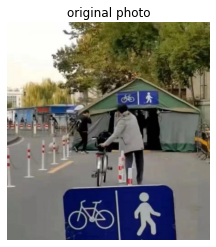

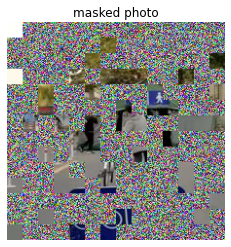

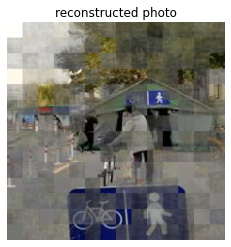

In [10]:
# 推理
# 模型重建的效果图，mask 效果图
recons_img_ts, masked_img_ts = mae.predict(img_ts)
recons_img_ts, masked_img_ts = recons_img_ts.cpu().squeeze(0), masked_img_ts.cpu().squeeze(0)

# 将结果保存下来以便和原图比较
recons_img = ToPILImage()(recons_img_ts)
recons_img.save(os.path.join(BASE_DIR, 'recons_photo.jpg'))

masked_img = ToPILImage()(masked_img_ts)
masked_img.save(os.path.join(BASE_DIR, 'masked_photo.jpg'))

# 画图
img = Image.open(os.path.join(BASE_DIR, 'photo.jpg'))
plt.figure("original photo")  # 图像窗口名称
plt.imshow(img)
plt.axis('off')  # 关掉坐标轴为 off
plt.title('original photo')  # 图像题目
plt.show()

img = Image.open(os.path.join(BASE_DIR, 'masked_photo.jpg'))
plt.figure("masked photo")  # 图像窗口名称
plt.imshow(img)
plt.axis('off')  # 关掉坐标轴为 off
plt.title('masked photo')  # 图像题目
plt.show()

img = Image.open(os.path.join(BASE_DIR, 'recons_photo.jpg'))
plt.figure("reconstructed photo")  # 图像窗口名称
plt.imshow(img)
plt.axis('off')  # 关掉坐标轴为 off
plt.title('reconstructed photo')  # 图像题目
plt.show()

In [11]:
# %reload_ext tensorboard
%tensorboard --logdir '/home/Insight/runs'

UsageError: Line magic function `%tensorboard` not found.


# 完成任务之后，把输出的材料保存到google drive
* 因为虚拟机上的东西生命周期到了就消失了

In [12]:
# 复制tensorboard记录
!/bin/cp -rf /home/Insight/runs/*  /content/drive/MyDrive/Insight/runs
print('runs copy completed!')
# 复制saved models模型参数
!/bin/cp -rf /home/Insight/saved_models/* /content/drive/MyDrive/Insight/saved_models
print('models copy completed!')

runs copy completed!
models copy completed!


## 显示时间

In [13]:
# 如果一段时间不需要用显卡的话，可以整个僵尸参数占用点显存，避免出现警告
# import torch
# a = torch.Tensor([1000, 1000, 1000]).cuda()  # 大约占用 1.1G 显存
!date --date='+8 hour'  # 查看系统时间，转换为北京时间

Sun Apr 17 16:17:33 UTC 2022
